### Importing libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r"C:\Users\dioog\02. Bloomberg Analysis"

In [4]:
df = pd.read_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3.csv"))

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
0,0,0,AAPL US Equity,APPLE INC,2.045317e+12,1.0,Technology,NASDAQ GS,UNITED STATES,US,...,80.46,91.03,108.94,134.18,116.79,108.77,0.956738,pos_performers,High Value,high_positive_performance
1,1,1,ARAMCO AB Equity,SAUDI ARABIAN OI,1.887799e+12,2.0,Energy,Saudi Arabia,SAUDI ARABIA,SA,...,8.76,8.72,8.80,9.40,9.53,9.12,0.384372,no_data,High Value,no data
2,2,2,MSFT US Equity,MICROSOFT CORP,1.642367e+12,3.0,Technology,NASDAQ GS,UNITED STATES,US,...,182.83,204.70,216.54,227.27,212.46,202.33,0.540618,pos_performers,High Value,high_positive_performance
3,3,3,AMZN US Equity,AMAZON.COM INC,1.571013e+12,4.0,Communications,NASDAQ GS,UNITED STATES,US,...,2471.04,2878.70,3111.89,3499.12,3221.26,3004.48,0.771315,pos_performers,High Value,high_positive_performance
4,4,4,GOOGL US Equity,ALPHABET INC-A,1.202594e+12,5.0,Communications,NASDAQ GS,UNITED STATES,US,...,1434.87,1442.00,1482.76,1655.08,1487.90,1624.32,0.568911,pos_performers,High Value,high_positive_performance


In [6]:
df.shape

(4937, 32)

### Cleaning data 

##### missing values

In [7]:
# Checking for missing values

df.isnull().sum()

Unnamed: 0                    0
Unnamed: 0.1                  0
Ticker                        0
Short Name                    0
Market Cap                    0
Rank(Current Market Cap)      0
Sector                        0
Prim Exch Nm                  0
Country                       0
Cntry of Incorp               0
Best Analyst Rating         113
52Wk High                     0
52Wk Low                      0
52Wk Low Dt                   0
52Wk High Dt                  0
1Y Tot Ret (%)                0
02/12/2019                    0
01/01/2020                    0
03/02/2020                    0
02/03/2020                    0
01/04/2020                    0
01/05/2020                    0
01/06/2020                    0
01/07/2020                    0
03/08/2020                    0
01/09/2020                    0
01/10/2020                    0
02/11/2020                    0
ratio_yearvar_meanprice       2
performance category          0
Value category                0
performa

In [8]:
# handling the 2 missing values found in "ratio_yearvar_meanprice", one of the variables that will be used in regression.

df_nan = df[df["ratio_yearvar_meanprice"].isnull() == True]

In [9]:
df_nan

,Unnamed: 0,Unnamed: 0.1,Ticker,Short Name,Market Cap,Rank(Current Market Cap),Sector,Prim Exch Nm,Country,Cntry of Incorp,...,01/06/2020,01/07/2020,03/08/2020,01/09/2020,01/10/2020,02/11/2020,ratio_yearvar_meanprice,performance category,Value category,performance category_2
2604,2604,2604,VTBR RM Equity,VTB BANK,6.319216e+09,2610.0,Financial,MICEX Main,RUSSIA,RU,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,neg_performers,Middle Value,high_negative_performance
4352,4352,4352,FEES RM Equity,FEDERAL GRID CO,3.311288e+09,4378.0,Utilities,MICEX Main,RUSSIA,RU,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,pos_performers,Low Value,moderate_positive_performance


In [10]:
df_clean = df[df["ratio_yearvar_meanprice"].isnull() == False]

In [11]:
df_clean.shape

(4935, 32)

##### duplicates

In [12]:
dups = df.duplicated()

In [14]:
dups.shape # No dups

(4937,)

##### extreme values

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='1Y Tot Ret (%)', ylabel='Density'>

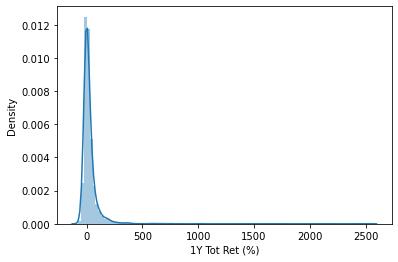

In [18]:
sns.distplot(df_clean["1Y Tot Ret (%)"], bins=100) # Shows extreme values

# There are outlier companies that performed much better than mean. 

# But there is no reasonable justification for removing them at this point.

In [20]:
df_clean["1Y Tot Ret (%)"].mean()

26.126739614994907

In [21]:
df_clean["1Y Tot Ret (%)"].max()

2547.54

In [22]:
df_clean["1Y Tot Ret (%)"].min()

-77.79

### Exploring data visually 

In [23]:
# Creating a dataframe that excludes companies that are listed in the stockmarket for less than one year and that, for this reason, "1Y Tot Ret (%)" equals zero. 

df_clean2 = df_clean[df_clean["1Y Tot Ret (%)"] != 0]

In [24]:
df_clean2.shape

(4779, 32)

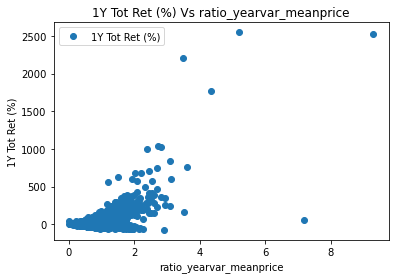

In [39]:
# Creating a scatterplot using matplotlib 

df_clean2.plot(x = "ratio_yearvar_meanprice", y="1Y Tot Ret (%)" ,style='o') 
plt.title("1Y Tot Ret (%) Vs ratio_yearvar_meanprice")  
plt.xlabel("ratio_yearvar_meanprice")  
plt.ylabel("1Y Tot Ret (%)")  
plt.show()

### Stating hypothesis 

##### the companies that experienced bigger drops in value because of the pandemic, are also likelier to have performed better throughout the year.

### Reshaping the variables into NumPy arrays, with X = independent variable and y = dependent variable.

In [28]:
# Reshaping the variables into NumPy arrays 

X = df_clean2["ratio_yearvar_meanprice"].values.reshape(-1,1)
y = df_clean2["1Y Tot Ret (%)"].values.reshape(-1,1)

In [30]:
X

array([[0.95673832],
       [0.54061772],
       [0.77131536],
       ...,
       [0.17565572],
       [0.09644018],
       [1.27687045]])

In [31]:
y

array([[79.75],
       [43.23],
       [77.83],
       ...,
       [ 4.05],
       [ 2.99],
       [87.66]])

### Spliting the data into two sets: a training set and a test set.

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
X_train.shape

(3345, 1)

In [34]:
X_test.shape

(1434, 1)

### Running a linear regression on the data.

In [35]:
# Creating a regression object.

regression = LinearRegression()  

In [36]:
# Fitting the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [37]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

In [38]:
y_predicted

array([[ 17.31010769],
       [-11.82452988],
       [-11.93022886],
       ...,
       [ 55.59420095],
       [ 25.77937824],
       [ 33.34078011]])

### Creating a plot that shows the regression line on the test set

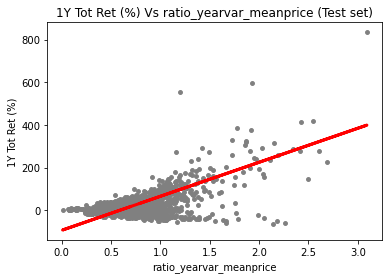

In [43]:
# Creating a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title("1Y Tot Ret (%) Vs ratio_yearvar_meanprice (Test set)")
plot_test.xlabel("ratio_yearvar_meanprice")
plot_test.ylabel("1Y Tot Ret (%)")
plot_test.show()

### Interpreting fit 

##### The model does not seem to be well fitted to the data. 

##### Especially for the cases where the "ratio_yearvar_meanprice" is higher.

##### clearly there are more variables that need to be taken into consideration when predicting "1Y Tot Ret (%)".

### Checking the model performance statistics - MSE and R2.

In [41]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [42]:
# Printing the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[159.25214182]]
Mean squared error:  3090.5848887001657
R2 score:  0.21023736387630887


### Comparing the predicted y values with the actual y values in a dataframe.

In [44]:
# Creating a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,24.20,17.310108
1,15.71,-11.824530
2,-30.64,-11.930229
3,-4.40,36.113479
4,17.15,99.867375
5,76.89,77.826041
6,-20.56,21.998004
7,-0.66,-20.748098
8,-17.16,6.254538
9,141.12,95.676398


### Comments

##### The slope is positive as expected.

#####  The MSE is very large. Prediction is not accurate.

#####  The low R2 also confirms the poor fit.

##### clearly there are more variables that need to be taken into consideration when predicting "1Y Tot Ret (%)".

##### Especially during such a singular period of the world economy.

#####  Impact of data bias is non-existant.

In [45]:
df_clean2.to_csv(os.path.join(path, "02_Data", "Prepared data", "df_Vs3_clean2_exe6-4.csv"))